In [34]:
#importando librerías

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [35]:
# Cargando los datos

datasets = pd.read_csv('Social_network.csv')
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values

In [36]:
# Dividiendo el dataset

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [37]:
# Escalando los datos


sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)


In [38]:
# Entrenando el modelo

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [39]:
# Prediciendo
classifier = classifier.fit(X_Train,Y_Train)
Y_Pred = classifier.predict(X_Test)

In [45]:
# Creando la matriz de confusión

cm = confusion_matrix(Y_Test, Y_Pred)

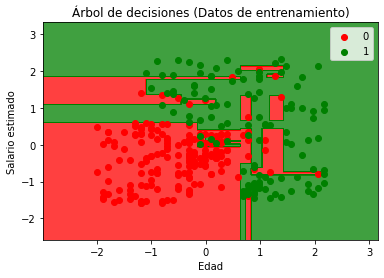

In [41]:
# Visualizando los datos de entrenamiento
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Árbol de decisiones (Datos de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Salario estimado')
plt.legend()
plt.show()

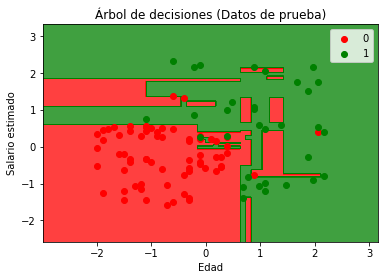

In [42]:
# Visualizando los datos de prueba
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Árbol de decisiones (Datos de prueba)')
plt.xlabel('Edad')
plt.ylabel('Salario estimado')
plt.legend()
plt.show()

[Ellipsis]

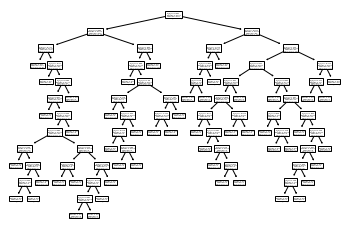

In [43]:
#mostrando el árbol de decisión
tree.plot_tree(classifier)
[...]